# Laboratorio de Regresión Lineal

Bienvenidos al laboratorio de Regresión Lineal utilizando el dataset de precios de casas en Boston. Este laboratorio está diseñado para ofrecer una comprensión práctica de cómo se implementa la regresión lineal en un escenario real de análisis de datos. A lo largo de este laboratorio, cargaremos y exploraremos el dataset de precios de casas de California, prepararemos los datos para el análisis, implementaremos la regresión lineal y evaluaremos el rendimiento de nuestro modelo.

## Objetivos del Laboratorio

- Cargar y explorar el dataset de precios de casas en Boston.
- Limpiar y preparar los datos para la regresión lineal.
- Analizar las correlaciones entre las diferentes características del dataset.
- Aplicar la regresión lineal para predecir el valor de las casas.
- Evaluar el rendimiento del modelo de regresión.

Este laboratorio es una excelente oportunidad para desarrollar habilidades prácticas en regresión lineal y análisis de datos, lo que constituye una base esencial en el campo del aprendizaje automático.


# Carga del Dataset de Viviendas de California

Vamos a trabajar con el dataset de Viviendas de California, que es un conjunto de datos utilizado para predecir el valor mediano de las viviendas en diferentes distritos de California. Este dataset proporciona una serie de características que pueden influir en los precios de las viviendas, como la ubicación, el número de habitaciones, el ingreso medio de los habitantes, entre otros.

## Columnas del Dataset

El dataset de Viviendas de California incluye las siguientes características:

- `longitude`: Longitud geográfica de la vivienda.
- `latitude`: Latitud geográfica de la vivienda.
- `housing_median_age`: Edad mediana de la vivienda.
- `total_rooms`: Número total de habitaciones en el distrito.
- `total_bedrooms`: Número total de dormitorios en el distrito.
- `population`: Población del distrito.
- `households`: Número de hogares en el distrito.
- `median_income`: Ingreso medio de los hogares en el distrito.
- `median_house_value`: Valor mediano de las viviendas ocupadas por sus propietarios.


In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Cargamos el dataset de Viviendas de California
california_data = fetch_california_housing()
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Seleccionamos la variable median_house_value como el target de la regresion
data['median_house_value'] = california_data.target

# Mostramos las primeras filas para inspección
print(data.head())


/var/folders/8t/_30q61fx5slbhg1f1kh3fhtc0000gn/T/ipykernel_88214/2658693849.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


## Inserción de Valores Nulos

El dataset de Viviendas de California originalmente no contiene valores nulos. Sin embargo, en situaciones del mundo real, es común enfrentarse a datasets con datos incompletos o perdidos. Para simular una situación más realista y practicar las técnicas de limpieza de datos, introduciremos valores nulos de forma aleatoria en nuestro dataset antes de proceder con la división en conjuntos de entrenamiento y prueba. Esta modificación nos permitirá luego aplicar métodos de imputación para manejar estos valores nulos de manera efectiva.

**NO MODIFICAR ESTE BLOQUE DE CODIGO**

In [2]:
import numpy as np

# Definir el porcentaje de datos que deseamos convertir en nulos
porcentaje_nulos = 0.02  # 2% de los datos

# Calcular el número total de valores a convertir en nulos
total_valores = data.shape[0] * data.shape[1]
total_nulos = int(total_valores * porcentaje_nulos)

# Generar índices aleatorios para insertar valores nulos
indices_filas = np.random.randint(0, data.shape[0], total_nulos)
indices_columnas = np.random.randint(0, data.shape[1], total_nulos)

# Insertar valores nulos en el dataset
for fila, columna in zip(indices_filas, indices_columnas):
    data.iat[fila, columna] = np.nan

# Verificación de los valores nulos insertados
print(f'Total de valores nulos insertados: {data.isnull().sum().sum()}')

Total de valores nulos insertados: 3662



## Separación en Conjuntos de Entrenamiento y Prueba

Para el análisis, separaremos el dataset en un conjunto de entrenamiento y un conjunto de prueba. Esta práctica es esencial para poder entrenar el modelo con un conjunto de datos y luego evaluar su rendimiento con un conjunto diferente, lo que nos proporciona una evaluación objetiva de la capacidad predictiva del modelo.


In [3]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Mostramos la cantidad de registros en cada conjunto
print(f'Tamaño del conjunto de entrenamiento: {train_data.shape[0]} registros')
print(f'Tamaño del conjunto de prueba: {test_data.shape[0]} registros')


Tamaño del conjunto de entrenamiento: 16512 registros
Tamaño del conjunto de prueba: 4128 registros


# Limpieza y Preparación de Datos

Una vez que hemos cargado el dataset de Viviendas de California, el siguiente paso es preparar los datos para el análisis y modelado. Esto implica limpiar los datos, lo que puede incluir la eliminación o imputación de valores nulos, y normalizar o escalar las características para que el modelo de regresión lineal pueda interpretarlos de manera efectiva.

## Limpieza de Datos

La limpieza de datos es crucial para asegurar la calidad del análisis. Vamos a verificar si hay valores nulos en el dataset y decidir cómo manejarlos, ya sea eliminándolos o rellenándolos con un valor representativo como la media o la mediana.


In [4]:
# Verificación de valores nulos
print(f'Valores nulos en cada columna en el conjunto de entrenamiento:\n{train_data.isnull().sum()}')
print(f'Valores nulos en cada columna en el conjunto de test:\n{test_data.isnull().sum()}')

# Eliminar filas donde 'median_house_value' es nulo
train_data = train_data.dropna(subset=['median_house_value'])
test_data = test_data.dropna(subset=['median_house_value'])

# Rellenar valores nulos en las demás columnas con el promedio
for column in train_data.columns:
    if column != 'median_house_value':  # Evitamos la columna objetivo
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        test_data[column].fillna(test_data[column].mean(), inplace=True)

# Ahora los datos no contienen valores nulos y están listos para la siguiente fase de procesamiento
print(f'Valores nulos después de la limpieza en el conjunto de entrenamiento:\n{train_data.isnull().sum()}')
print(f'Valores nulos después de la limpieza en el conjunto de prueba:\n{test_data.isnull().sum()}')


Valores nulos en cada columna en el conjunto de entrenamiento:
MedInc                337
HouseAge              319
AveRooms              322
AveBedrms             310
Population            314
AveOccup              323
Latitude              308
Longitude             355
median_house_value    339
dtype: int64
Valores nulos en cada columna en el conjunto de test:
MedInc                 85
HouseAge               84
AveRooms              100
AveBedrms              89
Population             72
AveOccup               83
Latitude               80
Longitude              69
median_house_value     73
dtype: int64
Valores nulos después de la limpieza en el conjunto de entrenamiento:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64
Valores nulos después de la limpieza en el conjunto de prueba:
MedInc                0
Hou

/var/folders/8t/_30q61fx5slbhg1f1kh3fhtc0000gn/T/ipykernel_88214/422892245.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mean(), inplace=True)
/var/folders/8t/_30q61fx5slbhg1f1kh3fhtc0000gn/T/ipykernel_88214/422892245.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

# Normalización o Escalado de Datos

La normalización o escalado de los datos es un paso crítico en el procesamiento de datos para el análisis de regresión lineal. Diferentes características del dataset pueden tener rangos de valores muy distintos. Por ejemplo, la población de un distrito puede variar entre miles o millones, mientras que la edad media de las viviendas puede estar entre 0 y 100 años. Si no se normalizan estos valores, una característica con un rango más amplio podría influir desproporcionadamente en el modelo y sesgar los resultados.

## ¿Por qué normalizar o escalar?

La normalización ayuda a garantizar que cada característica contribuya equitativamente al modelo de regresión, permitiendo una convergencia más rápida durante el entrenamiento y un modelo más equilibrado. Existen varias técnicas para escalar los datos, pero las más comunes son:

- **Normalización Min-Max**: Escala y centra los datos entre 0 y 1.
- **Estandarización Z-score**: Centra los datos en 0 con una desviación estándar de 1.

La elección entre estas técnicas depende del análisis específico de los datos y de las preferencias del modelo.

## Aplicación de la Normalización

Vamos a aplicar la normalización a nuestro dataset de Viviendas de California para preparar los datos para la regresión lineal.


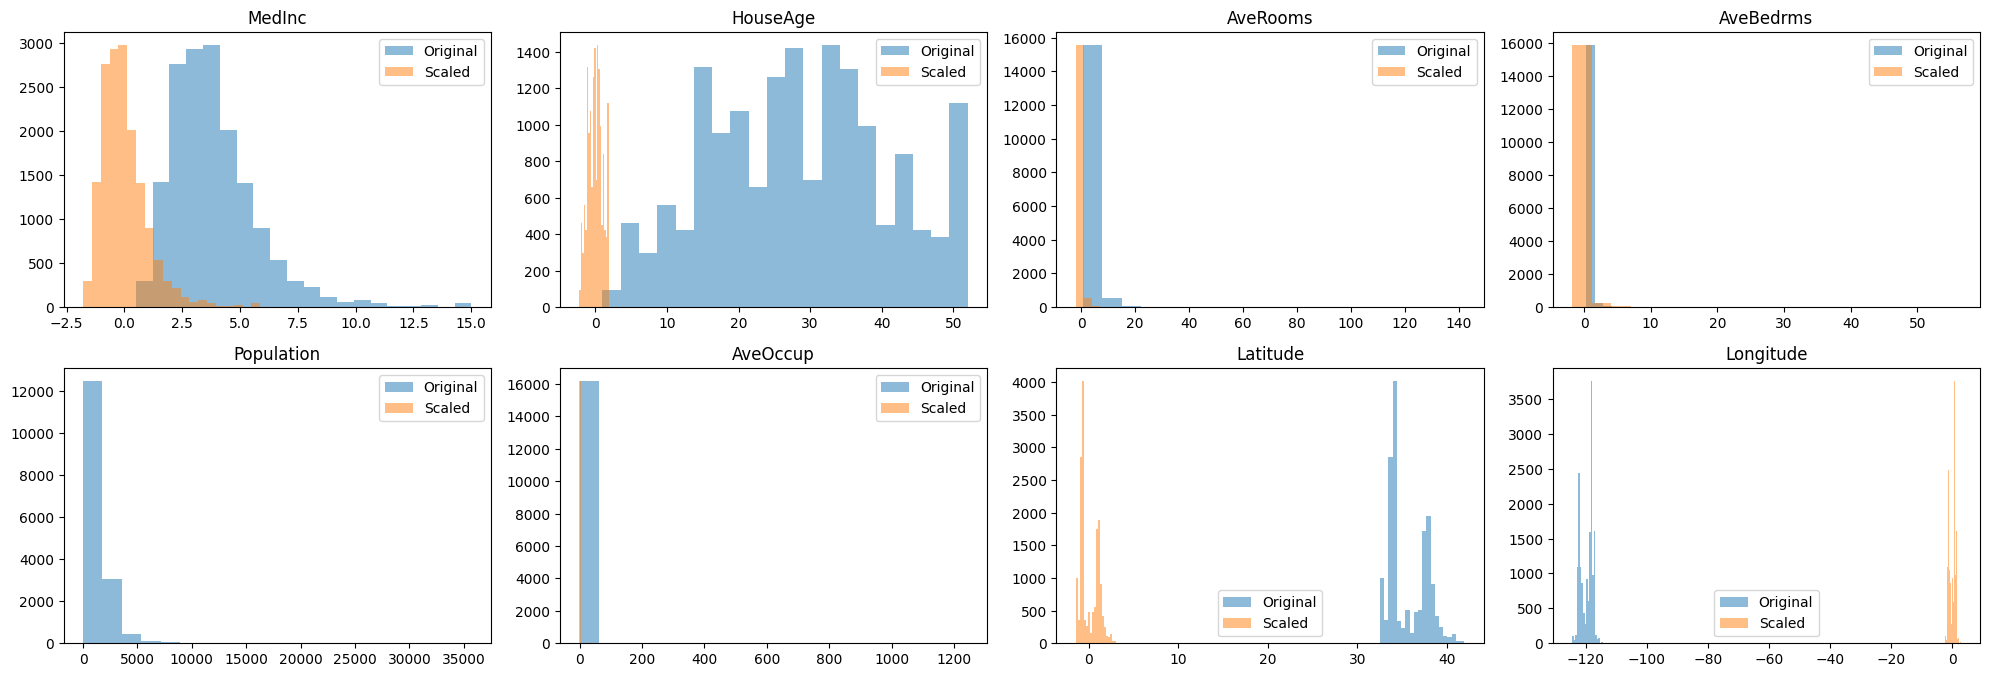

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Escoger el escalador: MinMaxScaler para normalización o StandardScaler para estandarización
scaler = StandardScaler()  # O usar MinMaxScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(train_data.drop('median_house_value', axis=1))
features = train_data.drop('median_house_value', axis=1).columns
train_data_scaled = pd.DataFrame(scaled_data, columns=features)
train_data_scaled['median_house_value'] = train_data['median_house_value'].values


# Opcional: mostrar gráficos para visualizar el efecto del escalado
plt.figure(figsize=(20, 10))

# Comparación antes y después del escalado
for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    plt.hist(train_data[col], alpha=0.5, label='Original', bins=20)
    plt.hist(train_data_scaled[col], alpha=0.5, label='Scaled', bins=20)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()


## Escalado del Conjunto de Prueba

Es esencial aplicar el mismo escalado al conjunto de prueba que utilizamos en el conjunto de entrenamiento. Esto mantiene la consistencia y asegura que las predicciones del modelo sean válidas y comparables entre ambos conjuntos de datos. Aplicar el mismo escalador (ajustado con los datos de entrenamiento) al conjunto de prueba evita la fuga de información y garantiza que el modelo sea evaluado de manera justa.

### Importancia de Usar el Mismo Escalador

Utilizar el mismo escalador asegura que:

- Mantenemos la integridad del proceso de evaluación del modelo, permitiendo que las predicciones en los datos de prueba sean comparables con el entrenamiento.
- Evitamos el sesgo en el modelo que podría surgir al ajustar el escalador con información del conjunto de prueba.
- Garantizamos que las transformaciones aplicadas sean coherentes en todo el conjunto de datos, lo cual es crucial para el rendimiento y la interpretación del modelo.

### Visualización del Escalado

Mostrar gráficos de los datos antes y después del escalado puede ayudar a visualizar cómo este proceso afecta la distribución de los datos en el conjunto de prueba, similar a lo que observamos en el conjunto de entrenamiento. Esto no solo confirma la aplicación correcta del escalado, sino que también proporciona una comprensión intuitiva de los cambios en los datos.

En resumen, la aplicación adecuada del escalado a los conjuntos de entrenamiento y prueba es un paso crítico para preparar los datos para el análisis de regresión lineal y garantizar la validez de las evaluaciones del modelo.


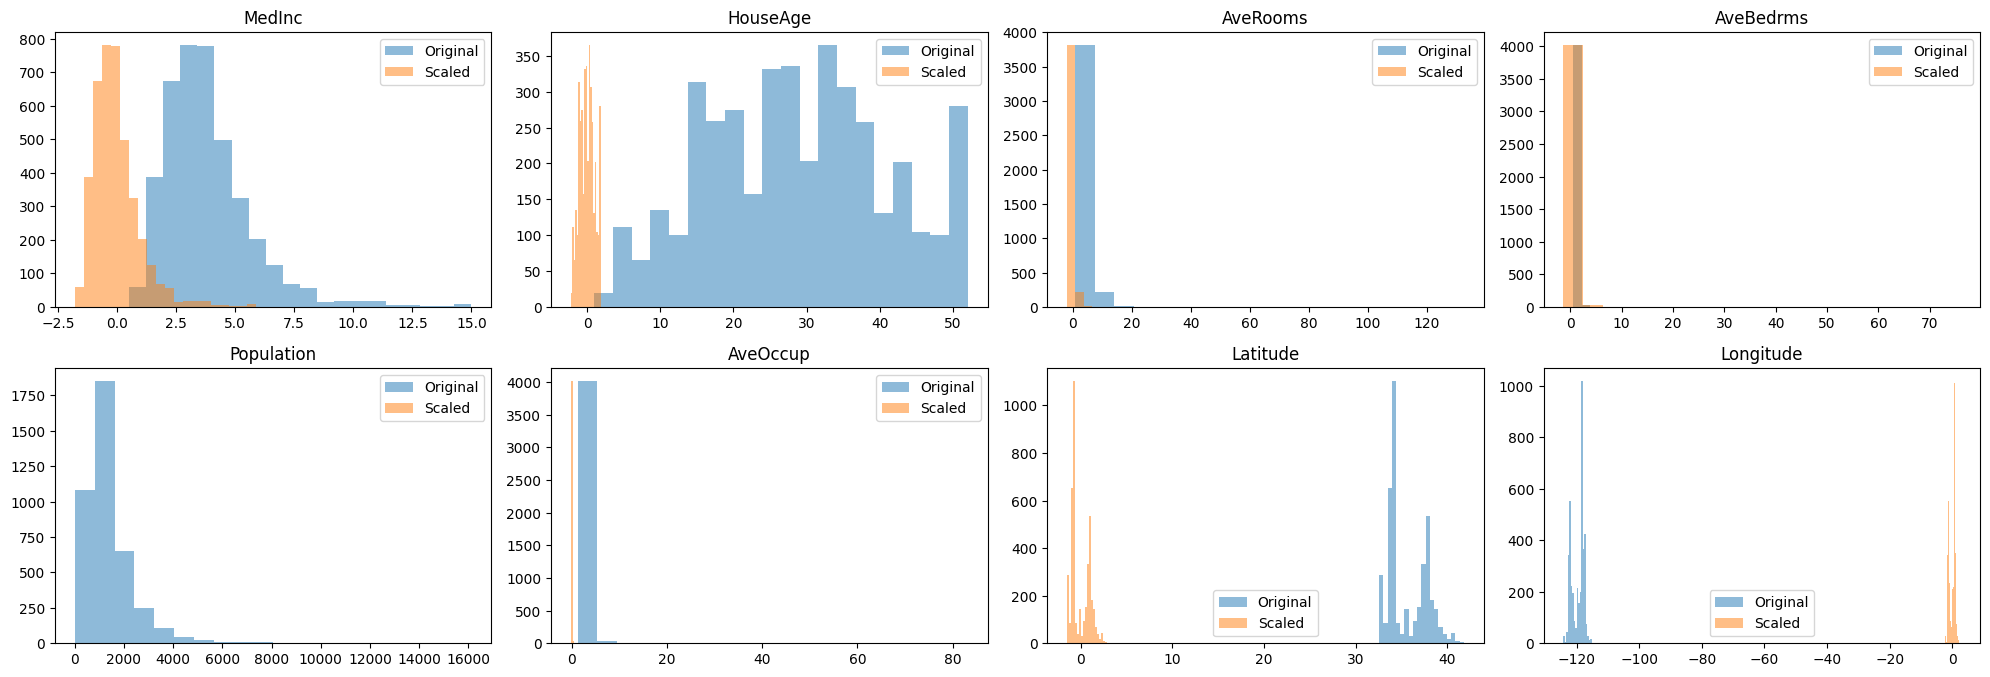

In [6]:
# Suponiendo que ya hemos ajustado el escalador al conjunto de entrenamiento como antes
scaled_test_data = scaler.transform(test_data.drop('median_house_value', axis=1))
test_data_scaled = pd.DataFrame(scaled_test_data, columns=features)
test_data_scaled['median_house_value'] = test_data['median_house_value'].values


# Opcional: mostrar gráficos para visualizar el efecto del escalado en el conjunto de prueba
plt.figure(figsize=(20, 10))

# Comparación antes y después del escalado
for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    plt.hist(test_data[col], alpha=0.5, label='Original', bins=20)
    plt.hist(test_data_scaled[col], alpha=0.5, label='Scaled', bins=20)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()


# Análisis de Correlaciones entre los Datos

En esta sección, realizaremos un análisis de correlaciones para entender cómo las diferentes características del dataset de Viviendas de California se relacionan entre sí y, lo más importante, cómo se relacionan con el precio mediano de las casas, que es nuestra variable objetivo.

El análisis de correlaciones nos ayuda a identificar posibles relaciones lineales entre las variables. Una correlación cercana a 1 indica una fuerte relación positiva, mientras que una correlación cercana a -1 indica una fuerte relación negativa. Una correlación cercana a 0 sugiere que no hay una relación lineal significativa entre las variables.

## Objetivos del Análisis de Correlaciones

- Generar un mapa de calor para visualizar las correlaciones entre las características.
- Identificar y seleccionar las características que tienen una correlación más fuerte con el precio mediano de las casas.


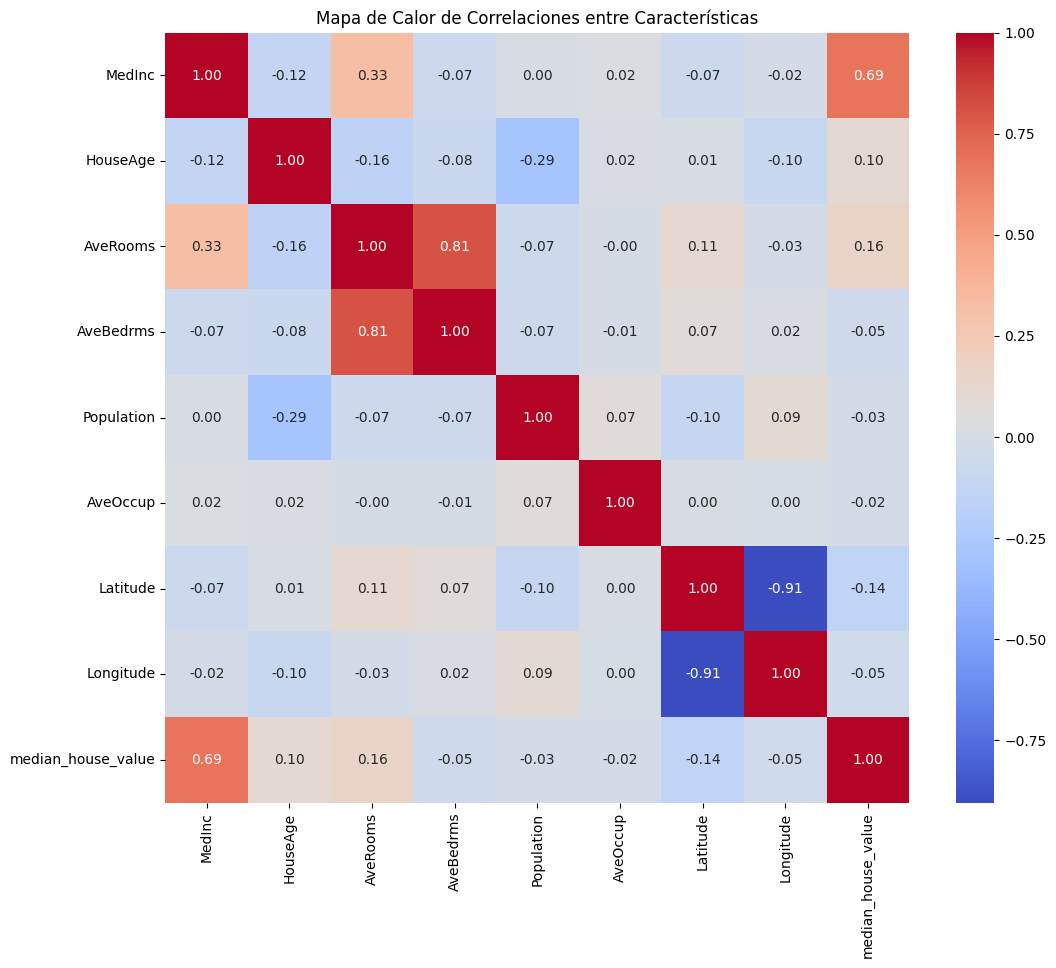

Correlaciones con 'median_house_value':
median_house_value    1.000000
MedInc                0.685377
AveRooms              0.157899
HouseAge              0.104597
AveOccup             -0.021463
Population           -0.026763
Longitude            -0.046800
AveBedrms            -0.051363
Latitude             -0.139917
Name: median_house_value, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación
correlation_matrix = train_data_scaled.corr()

# Generamos el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Características')
plt.show()

# Identificamos las características con mayor correlación con 'median_house_value'
correlation_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("Correlaciones con 'median_house_value':")
print(correlation_target)


# Construcción de las Matrices con las Principales Variables Correlacionadas

Tras analizar las correlaciones, hemos identificado las tres características más correlacionadas con el precio de las casas: `MedInc`, `AveRooms` y `HouseAge`. Utilizaremos estas variables para construir nuestra matriz de características $X$ y avanzar con la regresión lineal.

## Objetivos de esta Sección

- Utilizar **las variables con mejor correlacion** para preparar la matriz de características $X$.
- Añadir una columna de unos a $X$ para el término de intercepto.
- Preparar el vector de salida $Y$ con los precios de las casas.
- Aplicar la fórmula de la inversión de matriz para encontrar los coeficientes $\theta$, utilizando la ecuación $\theta = (X^T X)^{-1} X^T y$.


In [10]:
# Seleccionamos las variables con mayor correlación
# features_for_train = ['MedInc', 'AveRooms', 'HouseAge']
features_for_train = features
X = train_data[features_for_train]
y = train_data['median_house_value']

# Añadimos una columna de unos a X para el término de intercepto
X = np.c_[np.ones(X.shape[0]), X]

# Calculamos los coeficientes theta utilizando la fórmula de inversión de matriz
theta = np.linalg.inv(X.T @ X) @ X.T @ y

print('Coeficientes calculados para el modelo de regresión lineal usando las variables más correlacionadas:', theta)


Coeficientes calculados para el modelo de regresión lineal usando las variables más correlacionadas: [-2.89574137e+01  4.40021468e-01  1.16758356e-02 -8.76158982e-02
  5.64485665e-01  3.38745737e-06 -3.61451231e-03 -3.34797338e-01
 -3.41035920e-01]


Este bloque de código selecciona las tres características más correlacionadas con `median_house_value` para formar la matriz de características $X$, añade una columna de unos para el intercepto, y calcula los coeficientes $\theta$ usando la fórmula de inversión de matriz. Esta aproximación debería proporcionar un modelo de regresión lineal más robusto y representativo de la realidad del dataset.


# Evaluación de la Regresión

Después de construir el modelo de regresión lineal, es crucial evaluar su rendimiento utilizando el conjunto de prueba. Esto nos permite entender qué tan bien el modelo predice los precios de las viviendas fuera de la muestra de datos con la que fue entrenado.

## Objetivos de esta Sección

- Utilizar el conjunto de prueba para evaluar la regresión lineal encontrada.
- Calcular y mostrar métricas clave de rendimiento, como el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²).

Estas métricas nos proporcionarán una cuantificación clara del rendimiento del modelo. El MSE mide la media de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores estimados y los reales. Por otro lado, R² indica la proporción de la variabilidad de la variable dependiente que ha sido explicada por el modelo de regresión.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Preparamos los datos de prueba
test_X = test_data[features_for_train]
test_y = test_data['median_house_value']
test_X = np.c_[np.ones(test_X.shape[0]), test_X]

# Predecimos los valores para el conjunto de prueba
predicted_y = test_X @ theta

# Calculamos las métricas de rendimiento
mse = mean_squared_error(test_y, predicted_y)
r2 = r2_score(test_y, predicted_y)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')


Error Cuadrático Medio (MSE): 0.5858359326788615
Coeficiente de Determinación (R²): 0.5540542491289541


# Evaluación de la Regresión: Interpretación de MSE y R²

## Error Cuadrático Medio (MSE)

El MSE es una métrica que mide la calidad del modelo en términos de capacidad predictiva.

- **¿Qué mide?** El MSE calcula el promedio de los errores al cuadrado entre los valores predichos por el modelo y los valores reales.
- **Interpretación de los valores:**
  - **MSE = 0**: El modelo es perfecto, con predicciones exactas.
  - **MSE alto**: Indica errores grandes en las predicciones, lo que puede señalar un modelo inadecuado o una alta variabilidad en los datos.
- **Cómo interpretarlo:** Buscamos un MSE bajo, indicando menores errores en las predicciones. Es útil para comparar modelos en el mismo dataset, pero debe considerarse junto con la escala de los datos y otras métricas.

## Coeficiente de Determinación (R²)

El R² mide cuánta variabilidad en la variable dependiente puede explicarse con las variables independientes.

- **¿Qué mide?** Proporción de la variabilidad en la variable dependiente explicada por el modelo.
- **Interpretación de los valores:**
  - **R² = 1**: El modelo explica toda la variabilidad.
  - **R² = 0**: El modelo no explica la variabilidad.
  - **R² negativo**: Indica que el modelo es peor que una línea horizontal simple.
- **Cómo interpretarlo:** Un R² más alto sugiere un mejor ajuste del modelo a los datos. Sin embargo, un R² muy alto puede indicar sobreajuste, especialmente en modelos con muchas variables. Debe buscarse un equilibrio entre un R² alto y la complejidad del modelo.

La interpretación de MSE y R² debe hacerse en contexto y considerando los objetivos específicos del análisis, utilizando estas métricas junto con otras herramientas de diagnóstico para evaluar completamente el rendimiento del modelo.
